In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
bi_spec_e=np.load('bispec_phi_kkg_g_bin0equilat_lnPsToshiyaSettings_Bfit_Toshiya_Lmin1-Lmax10001-lmax10001-lenBi250.npy')

In [4]:
ell_e=pickle.load(open('ell_equilat_Lmin1_Lmax10000_lmax10000_lenL163_lenl163_lenang163_1e-02.pkl','r'))

In [5]:
bi_spec_s=np.load('bispec_phi_kkg_g_bin0squeezed_lnPsToshiyaSettings_Bfit_Planck2015_TTlowPlensing_Lmin1-Lmax10000-lmax5000-lenBi200.npy')

In [6]:
ell_s=np.load('ell_squeezed_Lmin1_Lmax10000_lmax10000_lenL163_lenl163_lenang163_1e-02.pkl')

In [7]:
bispec_d=np.load('bispec_delta_kkg_g_bin0equilat_lnPsToshiyaSettings_Bfit_Planck2015_TTlowPlensing_Lmin1-Lmax10001-lmax10001-lenBi250.npy')

In [8]:
Le1=np.asarray(ell_e[0::3])

In [9]:
Le2=np.asarray(ell_e[1::3])

In [10]:
Le3=np.asarray(ell_e[2::3])

In [11]:
Le=np.asarray(ell_e[0::3])

In [12]:
def fullsky(l1,l2,l3):
    result=[]
    for i in xrange(len(l1)):
        res=1./4./np.pi
        for ll in [l1,l2,l3]:
            res*=(2.*ll[i]+1.)
        res=np.sqrt(res)
        L=(l1[i]+l2[i]+l3[i])
        if l1[i]<2000:
            if L%2.==0:
                L=L*0.5
                res*=(-1.)**L*np.sqrt(np.exp(3.)/2./np.pi)*(L+1.)**(-0.25)
                for ll in [l1,l2,l3]:
                    res*=(L-ll[i]+1.)**(-0.25)*((L-ll[i]+0.5)/(L-ll[i]+1.))**(L-ll[i]+0.25)
            else:
                res=0.
        else:
            res=1.
        result+=[res]
    return np.asarray(result)

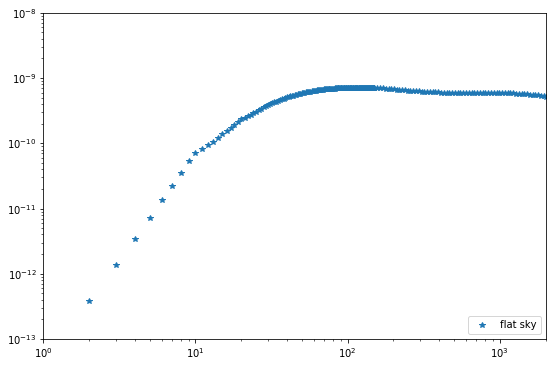

In [13]:
g = lambda ll: (ll)**2#*1./4.*((ll+1.))**4
plt.figure(figsize=(9,6))
#plt.loglog(Le1,g(Le1)*abs(fullsky_2(Le1,Le2,Le3)*(bi_spec_e)), marker='*',ls='',label='full sky')
#plt.loglog(Le1,g(Le1)*abs(fullsky(Le1,Le2,Le3)*bi_spec_e), marker='*',ls='',label='full sky TN')
plt.loglog(Le1,1./4.*g(Le1)*bi_spec_e, marker='*',ls='',label='flat sky')
plt.ylim(1e-13,1e-8)
plt.xlim(1,2000)
plt.legend(loc='lower right')
plt.savefig('bispec_equilat_gil_marin.png')

In [14]:
bispec_d.shape

(250, 200)

In [15]:
data=pickle.load(open('z_k_equilat.pkl','r'))
z=data[0]
z.shape
k=data[1].T[0::3]
k.shape, z.shape
z[1]

5.4430766877507195e-05

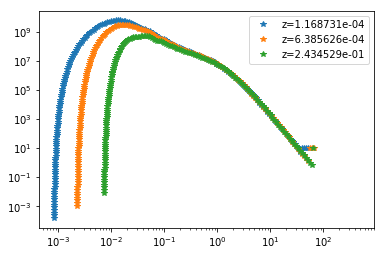

In [16]:
plt.figure()
for ii in [10,30,100]:
    plt.loglog(k[ii],bispec_d[ii],label='z=%e'%z[ii],marker='*',ls='')
    plt.legend(loc='best')
plt.savefig('bispec_delta_equilat.png')
plt.show()

In [17]:
pickle.dump([Le1,g(Le1)*bi_spec_e],open('bispec_kkg_equilat.pkl','w'))

In [18]:
Le1,b=pickle.load(open('bispec_kkg_equilat.pkl','r'))

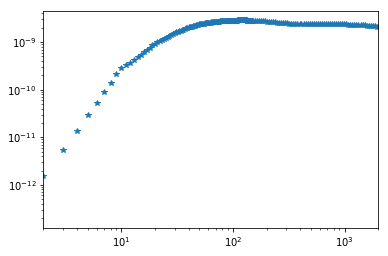

In [19]:
plt.figure()
plt.loglog(Le1,b,marker='*',ls='')
plt.xlim(2,2000)
plt.show()

In [ ]:
bispec_e=''